<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Simple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 2: Loading the Data and Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [2]:
data = pd.read_csv("/content/Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Remove the index column

In [5]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Task 4: Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


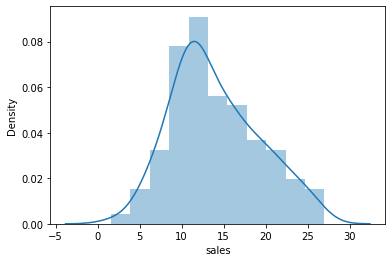

In [7]:
import seaborn as sns
sns.distplot(data.sales)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


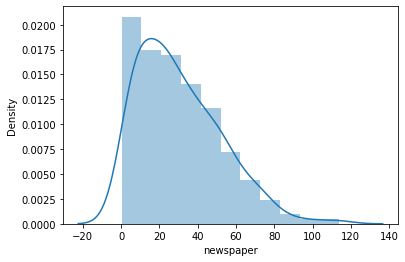

In [8]:
sns.distplot(data.newspaper)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


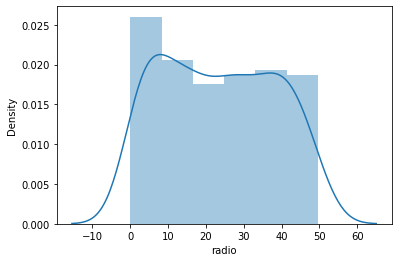

In [9]:
sns.distplot(data.radio)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


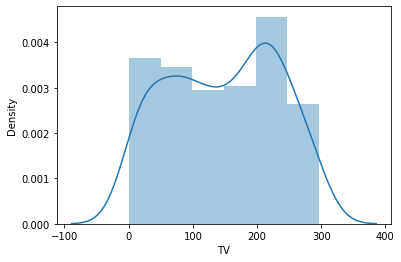

In [10]:
sns.distplot(data.TV)

### Task 5: Exploring Relationships between Predictors and Response

In [ ]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, kind='reg', aspect=0.7)

In [ ]:
data.TV.corr(data.sales)

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='Pastel1')

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [ ]:
X = data[['TV']]
y = data['sales']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

### Task 7: Interpreting Model Coefficients

In [ ]:
model.intercept_

In [ ]:
model.coef_

### Task 8: Making Predictions with our Model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:6]

### Task 9: Model Evaluation Metrics

In [ ]:
true = [100,50,30,20]
pred = [90,50,50,30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [ ]:
# (10+0+20+10)/4
# 10
from sklearn import metrics

metrics.mean_absolute_error(true, pred)

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [ ]:
metrics.mean_squared_error(true, pred)

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [ ]:
(metrics.mean_squared_error(true, pred))*(1/2)